# i - Query SQL
> Tulis query yang telah dibuat untuk mengambil data dari Google Cloud Platform di bagian ini.

```
SELECT
      limit_balance,
      CAST (sex AS INT64) AS sex,
      CAST (education_level AS INT64) AS education_level,
      CAST (marital_status AS INT64) AS marital_status, age,
      pay_0, pay_2, pay_3, pay_4,
      CAST (pay_5 AS FLOAT64) AS pay_5,
      CAST (pay_6 AS FLOAT64) AS pay_6,
      bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6,
      pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6,
      CAST (default_payment_next_month AS INT64) AS default_payment_next_month
FROM
      bigquery-public-data.ml_datasets.credit_card_default
Limit
      39960       # 20 (Batch) x 1998 (Tahun Lahir)
```

# ii - Import Libraries
> *Cell* pertama pada *notebook* **harus berisi dan hanya** berisi semua *library* yang digunakan dalam project.

In [1]:
# Import Libraries

# Buat memproses data
import pandas as pd
import numpy as np

# Buat memproses grafik
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Buat Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

# Buat definisi model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Buat evaluasi model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

# Buat cross validation
from sklearn.model_selection import cross_val_score

# Buat import hasil model saving
import joblib

# iii - Data Loading
> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
df = pd.read_csv ("Credit Card Default.csv")

In [3]:
# Menampilkan 10 data pertama
df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000,1,6,1,54,0,0,0,0,0,...,29296,26210,17643,2545,2208,1336,2232,542,348,1
1,200000,1,4,1,49,0,0,0,0,0,...,50146,50235,48984,1689,2164,2500,3480,2500,3000,0
2,20000,2,6,2,22,0,0,0,0,0,...,1434,500,0,4641,1019,900,0,1500,0,1
3,260000,2,4,2,33,0,0,0,0,0,...,27821,30767,29890,5000,5000,1137,5000,1085,5000,0
4,150000,1,4,2,32,0,0,0,-1,0,...,150464,143375,146411,4019,146896,157436,4600,4709,5600,0
5,300000,2,4,2,32,0,0,0,0,0,...,65150,-450,700,15235,1491,1303,0,2000,1400,0
6,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
7,200000,1,1,1,58,0,0,0,0,0,...,124647,126921,129167,7822,4417,4446,4597,4677,4698,0
8,500000,1,1,1,39,0,0,0,0,0,...,174500,137406,204975,54209,4607,4603,5224,207440,7509,0
9,230000,1,1,1,48,0,0,0,0,0,...,105508,108101,110094,7000,6607,3773,4290,4164,2000,0


In [4]:
# Menampilkan 10 data terakhir
df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,360000,2,2,2,26,-1,-1,-1,-1,-2,...,0,0,0,463,2500,0,0,0,0,0
2956,100000,1,3,1,40,0,0,-1,-1,-2,...,0,0,0,2000,2377,40000,0,0,0,0
2957,30000,2,3,1,48,1,-1,-1,-2,-2,...,0,0,0,200,0,0,0,0,0,0
2958,80000,2,3,1,39,-1,-1,-1,-1,-2,...,0,0,5000,5000,5000,0,5000,5000,470,0
2959,20000,1,3,2,26,-1,-1,-1,-2,-2,...,0,0,0,1560,0,0,0,0,0,0
2960,80000,2,3,2,28,-1,-1,-1,-2,-2,...,0,0,0,2800,0,0,0,0,0,0
2961,50000,2,3,1,51,-1,-1,-1,-1,-2,...,0,0,0,300,5880,0,0,0,0,1
2962,450000,2,2,1,38,-2,-2,-2,-2,-2,...,390,390,390,390,780,390,390,390,390,1
2963,50000,2,2,1,44,-2,-2,-2,-2,-2,...,390,390,0,390,390,390,390,0,780,0
2964,290000,2,2,1,39,1,-2,-2,-2,-2,...,3184,390,390,10000,800,3184,390,390,6617,0


In [5]:
# Menampilkan dataFrame
df

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000,1,6,1,54,0,0,0,0,0,...,29296,26210,17643,2545,2208,1336,2232,542,348,1
1,200000,1,4,1,49,0,0,0,0,0,...,50146,50235,48984,1689,2164,2500,3480,2500,3000,0
2,20000,2,6,2,22,0,0,0,0,0,...,1434,500,0,4641,1019,900,0,1500,0,1
3,260000,2,4,2,33,0,0,0,0,0,...,27821,30767,29890,5000,5000,1137,5000,1085,5000,0
4,150000,1,4,2,32,0,0,0,-1,0,...,150464,143375,146411,4019,146896,157436,4600,4709,5600,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000,2,3,2,28,-1,-1,-1,-2,-2,...,0,0,0,2800,0,0,0,0,0,0
2961,50000,2,3,1,51,-1,-1,-1,-1,-2,...,0,0,0,300,5880,0,0,0,0,1
2962,450000,2,2,1,38,-2,-2,-2,-2,-2,...,390,390,390,390,780,390,390,390,390,1
2963,50000,2,2,1,44,-2,-2,-2,-2,-2,...,390,390,0,390,390,390,390,0,780,0


Penjelasan tiap kolom:

| Kolom      | Penjelasan |
| :-----------: | ----------- |
|`limit_balance`| Amount of given credit in NT dollars (includes individual and family/supplementary credit)|
|`sex` | Gender (1=male, 2=female) |
|`education_level` | Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) |
|`marital_status` | Marital status (1=married, 2=single, 3=others) |
|`age` | Age in years |
|`pay_0` | Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above) |
|`pay_2` | Repayment status in August, 2005 (scale same as above) |
|`pay_3` | Repayment status in July, 2005 (scale same as above)  |
|`pay_4` | Repayment status in June, 2005 (scale same as above) |
|`pay_5` | Repayment status in May, 2005 (scale same as above)  |
|`pay_6` | Repayment status in April, 2005 (scale same as above)  |
|`bill_amt_1` | Amount of bill statement in September, 2005 (NT dollar)   |
|`bill_amt_2` | Amount of bill statement in August, 2005 (NT dollar) |
|`bill_amt_3` | Amount of bill statement in July, 2005 (NT dollar) |
|`bill_amt_4` | Amount of bill statement in June, 2005 (NT dollar) |
|`bill_amt_5` | Amount of bill statement in May, 2005 (NT dollar) |
|`bill_amt_6` | Amount of bill statement in April, 2005 (NT dollar) |
|`pay_amt_1` | Amount of previous payment in September, 2005 (NT dollar) |
|`pay_amt_2` | Amount of previous payment in August, 2005 (NT dollar) |
|`pay_amt_3` | Amount of previous payment in July, 2005 (NT dollar) |
|`pay_amt_4` | Amount of previous payment in June, 2005 (NT dollar) |
|`pay_amt_5` | Amount of previous payment in May, 2005 (NT dollar) |
|`pay_amt_6` | Amount of previous payment in April, 2005 (NT dollar)  |
|`default_payment_next_month` | Default payment (1=yes, 0=no) |


# iv - Exploratory Data Analysis (EDA)
> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

## Melihat data statistik pada data frame

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2965.0,163369.308600,125030.415472,10000.0,50000.0,140000.0,230000.0,800000.0
sex,2965.0,1.607757,0.488333,1.0,1.0,2.0,2.0,2.0
education_level,2965.0,1.849578,0.778184,0.0,1.0,2.0,2.0,6.0
marital_status,2965.0,1.559865,0.522317,0.0,1.0,2.0,2.0,3.0
age,2965.0,35.193255,9.109439,21.0,28.0,34.0,41.0,69.0
pay_0,2965.0,0.005059,1.114395,-2.0,-1.0,0.0,0.0,8.0
pay_2,2965.0,-0.122428,1.180784,-2.0,-1.0,0.0,0.0,7.0
pay_3,2965.0,-0.141653,1.183630,-2.0,-1.0,0.0,0.0,7.0
pay_4,2965.0,-0.185160,1.178322,-2.0,-1.0,0.0,0.0,8.0
pay_5,2965.0,-0.225295,1.159003,-2.0,-1.0,0.0,0.0,7.0


## Mengubah nilai pada `education_level`
> Karena terdapat nilai 0, 5, 6 yang artinya unknown, jadi digabung agar tidak terlalu banyak variable

In [7]:
df['education_level'] = df['education_level'].replace([0, 6], 5)
df.groupby(['education_level']).count()

,limit_balance,sex,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
education_level,,,,,,,,,,,,,,,,,,,,,
1,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,...,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039
2,1400,1400,1400,1400,1400,1400,1400,1400,1400,1400,...,1400,1400,1400,1400,1400,1400,1400,1400,1400,1400
3,483,483,483,483,483,483,483,483,483,483,...,483,483,483,483,483,483,483,483,483,483
4,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
5,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30


## Melihat korelasi antara `age` dengan `limit_balance`

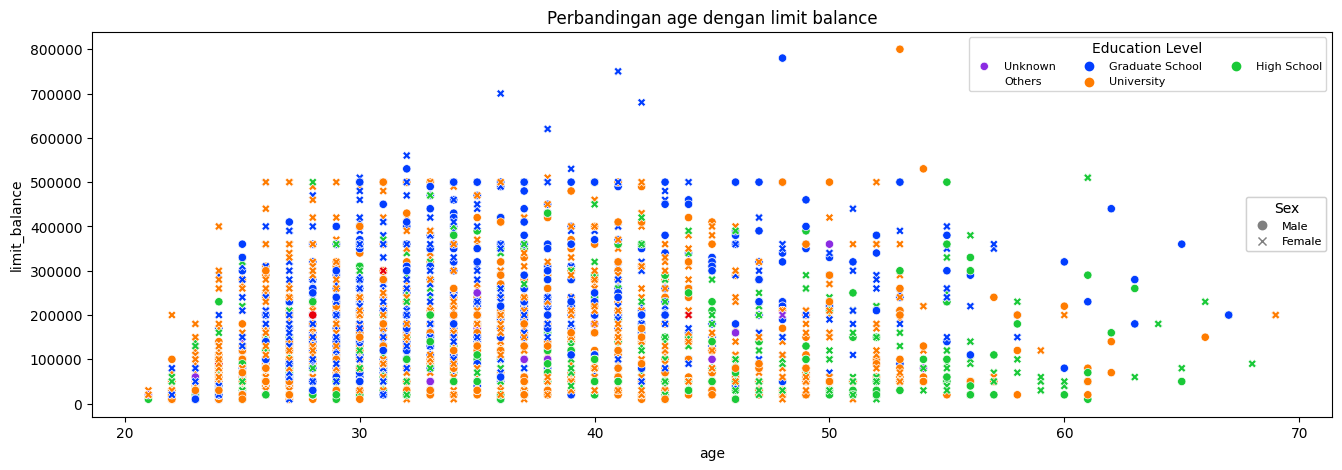

In [8]:
plt.figure(figsize = (16, 5))
sns.scatterplot(x='age', y='limit_balance', data=df, hue="education_level", style ='sex', palette='bright')
plt.title ('Perbandingan age dengan limit balance')

education_level_mapping = {1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others', 5: 'Unknown'}
sex_mapping = {1: 'Male', 2: 'Female'}

education_legend_labels = [education_level_mapping[i] for i in df['education_level'].unique()]
education_legend = plt.legend(education_legend_labels, loc='upper right', ncol=3, fontsize=8, title='Education Level')

sex_legend_labels = [sex_mapping[i] for i in df['sex'].unique()]
sex_legend_elements = [Line2D([0], [0], marker='o', color='gray', label='Male', linestyle='None'),
                       Line2D([0], [0], marker='x', color='gray', label='Female', linestyle='None')]
sex_legend = plt.legend(handles=sex_legend_elements, loc='right', fontsize=8, title='Sex')

plt.gca().add_artist(education_legend)
plt.gca().add_artist(sex_legend)

plt.show()

- Dapat dilihat bahwa pada grafik nilai `age` < 30 semakin tinggi `age` maka semakin tinggi `limit_balance` dan setelah itu rata
- Tetapi terlihat juga pada `limit_balance` > 500000, hanya ada `education_level` bertipe 'Graduate School' dan 'University', tidak memandang `sex`

## Visualisasi korelasi antar kolom
> - Menunjukkan korelasi pada antar kolom-kolom yang ada
> - Semakin tinggi angkanya atau semakin putih warnanya, maka sangat berkorelasi

<Axes: >

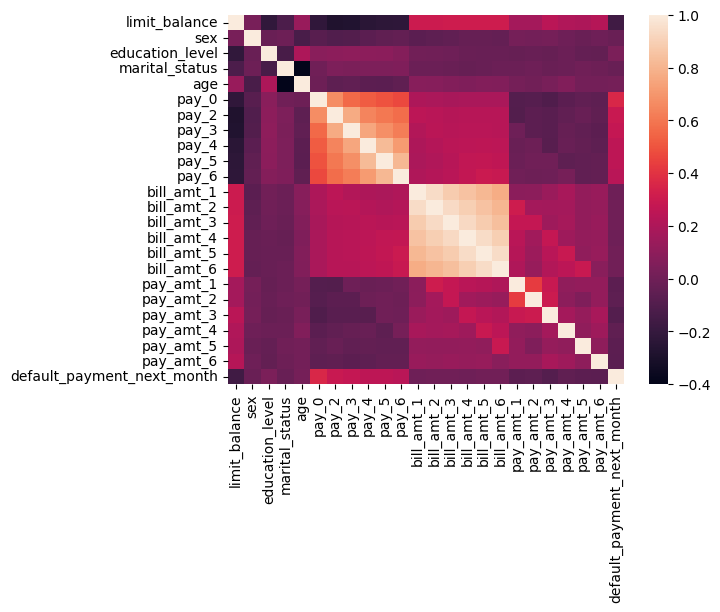

In [9]:
sns.heatmap(df.corr())

Dapat dilihat bahwa pada `pay_0 `sampai `pay_6` dan `bill_amt_1` sampai `bill_amt_6` sangat berkorelasi.

## Melihat perbandingan pada kategori

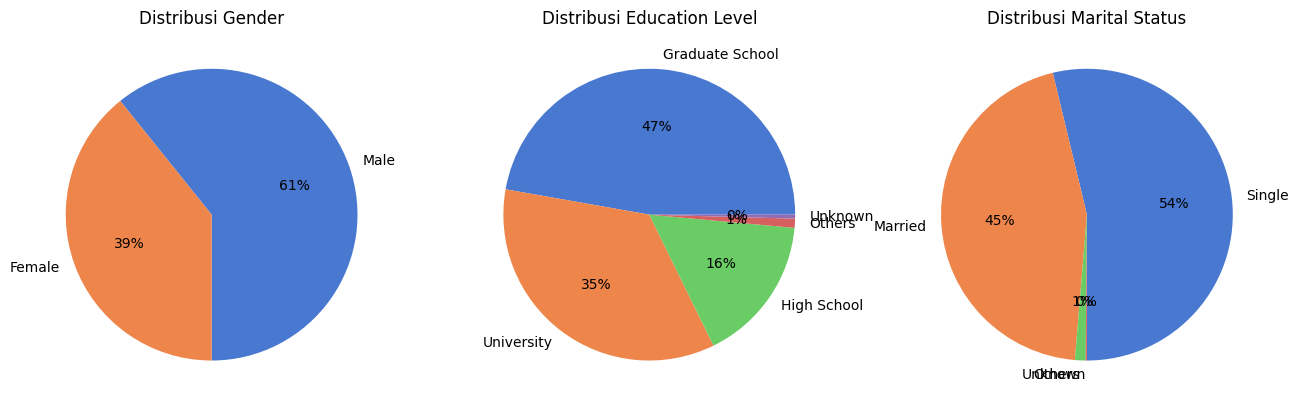

In [10]:
palette_color = sns.color_palette('muted')
plt.figure(figsize = (16, 5))

ax1 = plt.subplot(1, 3, 1)
plt.pie(df['sex'].value_counts(), colors=palette_color, autopct='%.0f%%', startangle=270, labels=['Male', 'Female'])
ax1 = plt.title ('Distribusi Gender')

ax2 = plt.subplot(1, 3, 2)
plt.pie(df['education_level'].value_counts(), colors=palette_color, autopct='%.0f%%', labels=['Graduate School', 'University', 'High School', 'Others', 'Unknown'])
ax2 = plt.title ('Distribusi Education Level')

ax3 = plt.subplot(1, 3, 3)
plt.pie(df['marital_status'].value_counts(), colors=palette_color, autopct='%.0f%%', startangle=270, labels=['Single', 'Married', 'Others', 'Unknown'])
ax3 = plt.title ('Distribusi Marital Status')

Dapat dilihat bahwa didominasi oleh 'Male', 'Graduate School', dan 'Single', kemungkinan para 'male' itu menggunakan credit untuk sekolah ke jenjang berikutnya ataupun membuka usaha.

## Melihat persebaran data pada `age`

Text(0.5, 1.0, 'Histogram dari age')

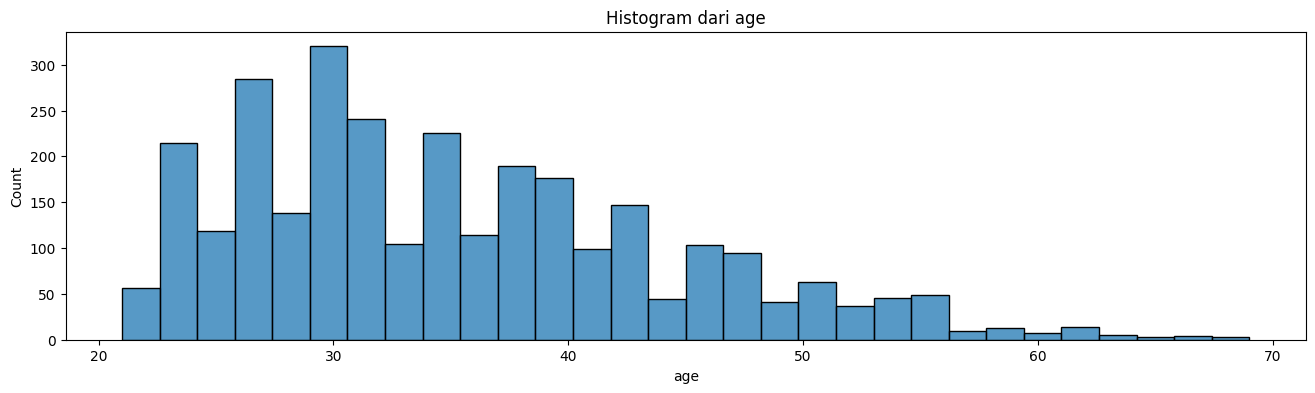

In [11]:
plt.figure(figsize=(16, 4))

sns.histplot(df['age'], bins=30)
plt.title('Histogram dari age')

Dapat dilihat bahwa pengguna credit didominasi oleh berumur 30 dan cenderung berkurang saat umurnya bertambah.

# v - Feature Engineering
> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Split X (Features) dan y (Target)

In [12]:
X = df.drop(['default_payment_next_month'], axis=1)
y = df['default_payment_next_month']

print (X.shape)
print (y.shape)

(2965, 23)
(2965,)


## Split Train-Set dan Test-Set

In [13]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 1509)

print ('X Train Size', X_train.shape)
print ('X Test Size:', X_test.shape)
print ()
print ('y Train Size', y_train.shape)
print ('y Test Size:', y_test.shape)

X Train Size (2372, 23)
X Test Size: (593, 23)

y Train Size (2372,)
y Test Size: (593,)


## Handle Missing Value

### X_train
> Tidak adanya data null pada X_train

In [14]:
X_train.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

### X_test
> Tidak adanya data null pada X_test

In [15]:
X_test.isnull().sum()       

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

### y_train
> Tidak adanya data null pada y_train

In [16]:
y_train.isnull().sum()

0

### y_test
> Tidak adanya data null pada y_test

In [17]:
y_test.isnull().sum()

0

## Handle Outlier

### Mengecek outlier pada `limit_balance`

Skewness Value age X_train:  1.04


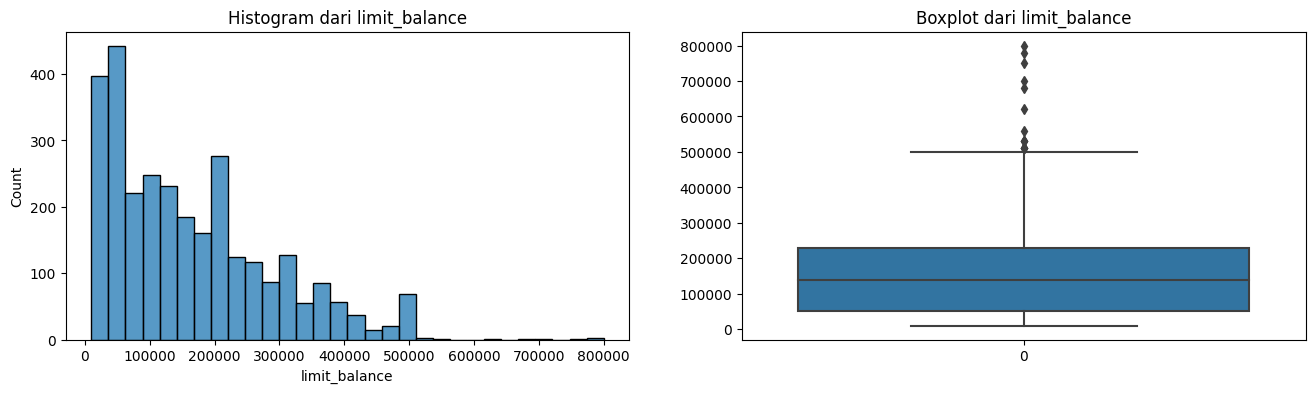

In [18]:
print('Skewness Value age X_train: ', X_train['limit_balance'].skew().round(decimals=2));
plt.figure(figsize=(16, 4));

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['limit_balance'].astype(float), bins=30)
plt.title('Histogram dari limit_balance')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(df['limit_balance'].astype(float))
plt.title('Boxplot dari limit_balance')

plt.show();

In [19]:
X_train_awal = X_train.copy()

# Membuat nilai 25 quantil yang disebut Q1 dan 75 quantil yang disebut Q3
Q1 = X_train['limit_balance'].quantile(0.25)
Q3 = X_train['limit_balance'].quantile(0.75)
print ('Nilai Q1: ', Q1)
print ('Nilai Q3: ', Q3)

# Membuat nilai IQR, dari Q3 - Q1
IQR = Q3 - Q1
print ('Nilai IQR: ', IQR)

# Membuat nilai batas bawah dengan rumus Q1 - (IQR * 1.5)
BatasBawah = Q1 - (IQR * 1.5)

# Membuat nilai batas atas dengan rumus Q3 + (IQR * 1.5)
BatasAtas = Q3 + (IQR * 1.5)

print ('Nilai Batas Bawah: ', BatasBawah)
print ('Nilai Batas Atas: ', BatasAtas)

# Menghilangkan angka-angka yang berada diluar batas bawah maupun batas atas
X_train = X_train[(X_train['limit_balance'] > BatasBawah) & (X_train['limit_balance'] < BatasAtas)]

# Menampilkan jumlah nilai, sebelum dan sesudah dihilangkan datanya
print ("Nilai sebelum: ", X_train_awal.shape[0])
print ("Nilai setelah: ", X_train.shape[0])
print()

print('Skewness Value train limit_balance: ', X_train['limit_balance'].skew().round(decimals=2))

Nilai Q1:  50000.0
Nilai Q3:  230000.0
Nilai IQR:  180000.0
Nilai Batas Bawah:  -220000.0
Nilai Batas Atas:  500000.0
Nilai sebelum:  2372
Nilai setelah:  2315

Skewness Value train limit_balance:  0.76


### Mengecek outlier pada `age`

Skewness Value hours_per_week:  0.78


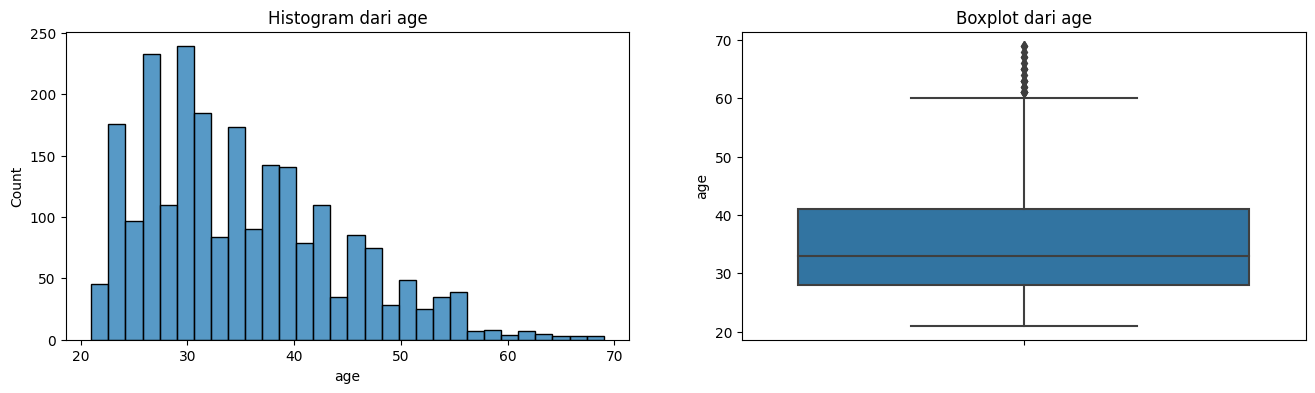

In [20]:
print('Skewness Value hours_per_week: ', X_train['age'].skew().round(decimals=2));

plt.figure(figsize=(16, 4));

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(X_train['age'].astype(float), bins=30)
plt.title('Histogram dari age')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train, y='age')
plt.title('Boxplot dari age')

plt.show()

In [21]:
X_train_awal = X_train.copy()

# Membuat nilai 25 quantil yang disebut Q1 dan 75 quantil yang disebut Q3
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
print ('Nilai Q1: ', Q1)
print ('Nilai Q3: ', Q3)

# Membuat nilai IQR, dari Q3 - Q1
IQR = Q3 - Q1
print ('Nilai IQR: ', IQR)

# Membuat nilai batas bawah dengan rumus Q1 - (IQR * 1.5)
BatasBawah = Q1 - (IQR * 1.5)

# Membuat nilai batas atas dengan rumus Q3 + (IQR * 1.5)
BatasAtas = Q3 + (IQR * 1.5)

print ('Nilai Batas Bawah: ', BatasBawah)
print ('Nilai Batas Atas: ', BatasAtas)

# Menghilangkan angka-angka yang berada diluar batas bawah maupun batas atas
X_train = X_train[(X_train['age'] > BatasBawah) & (X_train['age'] < BatasAtas)]

# Menampilkan jumlah nilai, sebelum dan sesudah dihilangkan datanya
print (X_train_awal.shape[0])    #Nilai sebelum
print (X_train.shape[0]) #Nilai setelah

print('Skewness Value age: ', X_train['age'].skew().round(decimals=2))

Nilai Q1:  28.0
Nilai Q3:  41.0
Nilai IQR:  13.0
Nilai Batas Bawah:  8.5
Nilai Batas Atas:  60.5
2315
2294
Skewness Value age:  0.64


In [22]:
# Menghilangkan data di y_train yang hilang saat outlier pada X_train
y_train = y_train.filter(items=X_train.index,axis=0)

## Feature Selection

In [23]:
numeric_feature = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

print ('Kolom numeric : ', numeric_feature)
print ('Kolom kategori : ', categorical_features)

Kolom numeric :  ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Kolom kategori :  []


In [24]:
# Menggunakan pipeline agar mempersingkat coding, dari Scaling, Encoding, dan Concate
numeric_transformer = Pipeline(steps=[("scaler", MinMaxScaler())])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_feature)])

pipe = Pipeline(steps=[("preprocessor", preprocessor)])

pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'sex',
                                                   'education_level',
                                                   'marital_status', 'age',
                                                   'pay_0', 'pay_2', 'pay_3',
                                                   'pay_4', 'pay_5', 'pay_6',
                                                   'bill_amt_1', 'bill_amt_2',
                                                   'bill_amt_3', 'bill_amt_4',
                                                   'bill_amt_5', 'bill_amt_6',
                                                   'pay_amt_1', 'pay_amt_2',
                                                   'pay_amt_3', 'pay_amt_4',
                                                   'pay_amt_5',
                                                   'pay_amt_6'])]))])

- Pada numeric scaler, digunakan MinMaxScaler karena datanya tidak terdistribusi secara normal, mengubah skala data menjadi 0 sampai 1
- Pada category encoder, karena tidak adanya data kategori sehingga tidak dilakukan encoding

# vi - Model Definition
> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

## Logistic Regression

In [25]:
# Mendefinisikan model Logistic Regression
model_log_reg = LogisticRegression()

## K-Nearest Neighbor

In [26]:
# Mendefinisikan model K-Nearest Neighbor
model_knn = KNeighborsClassifier()

## Naive Bayes

In [27]:
# Mendefinisikan model Naive Bayes
model_nb = GaussianNB()

## SVM

In [28]:
# Mendefinisikan model SVM dengan SVC
model_svc = SVC ()

## Decision Tree

In [29]:
# Mendefinisikan model Decision Tree
model_dtc = DecisionTreeClassifier()

## Random Forest

In [30]:
# Mendefinisikan model Random Forest
model_rfc = RandomForestClassifier()

# vii - Model Training
> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

## Logistik Regression

In [31]:
model_log_reg.fit(X_train, y_train)

C:\Users\farha\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## K-Nearest Neighbor

In [32]:
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

## Naive Bayes

In [33]:
model_nb.fit(X_train, y_train)

GaussianNB()

## SVM

In [34]:
model_svc.fit(X_train, y_train)

SVC()

## Decision Tree

In [35]:
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier()

## Random Forest

In [36]:
model_rfc.fit(X_train, y_train)

RandomForestClassifier()

# viii - Model Evaluation
> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. **Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.**



## Cross Validation

### Logistic Regression

In [37]:
score_train_cross_val_log_reg = cross_val_score (model_log_reg,
                                                X_train,
                                                y_train,
                                                cv=5)

print('Score - Mean - Cross Validation : ', score_train_cross_val_log_reg.mean())
print('Score - Std - Cross Validation  : ', score_train_cross_val_log_reg.std())

Score - Mean - Cross Validation :  0.7820389873562235
Score - Std - Cross Validation  :  0.003955307864896316


C:\Users\farha\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\farha\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

### K Nearest Neighbor

In [38]:
score_train_cross_val_knn = cross_val_score (model_knn,
                                            X_train,
                                            y_train,
                                            cv=5)

print('Score - Mean - Cross Validation : ', score_train_cross_val_knn.mean())
print('Score - Std - Cross Validation  : ', score_train_cross_val_knn.std())

Score - Mean - Cross Validation :  0.7436842956493611
Score - Std - Cross Validation  :  0.014270035283703424


### Naive Bayes

In [39]:
score_train_cross_val_nb = cross_val_score (model_nb,
                                            X_train,
                                            y_train,
                                            cv=5)

print('Score - Mean - Cross Validation : ', score_train_cross_val_nb.mean())
print('Score - Std - Cross Validation  : ', score_train_cross_val_nb.std())


Score - Mean - Cross Validation :  0.3653062001122623
Score - Std - Cross Validation  :  0.017467105268703605


### SVM

In [40]:
score_train_cross_val_svc = cross_val_score (model_svc,
                                            X_train,
                                            y_train,
                                            cv=5)

print('Score - Mean - Cross Validation : ', score_train_cross_val_svc.mean())
print('Score - Std - Cross Validation  : ', score_train_cross_val_svc.std())


Score - Mean - Cross Validation :  0.7816042088839417
Score - Std - Cross Validation  :  0.0008442381633959707


### Decision Tree

In [41]:
score_train_cross_val_dtc = cross_val_score (model_dtc,
                                            X_train,
                                            y_train,
                                            cv=3)

print('Score - Mean - Cross Validation : ', score_train_cross_val_dtc.mean())
print('Score - Std - Cross Validation  : ', score_train_cross_val_dtc.std())


Score - Mean - Cross Validation :  0.7175187352427882
Score - Std - Cross Validation  :  0.014065887289847563


### Random Forest

In [42]:
score_train_cross_val_rfc = cross_val_score (model_rfc,
                                            X_train,
                                            y_train,
                                            cv=3)

print('Score - Mean - Cross Validation : ', score_train_cross_val_rfc.mean())
print('Score - Std - Cross Validation  : ', score_train_cross_val_rfc.std())

Score - Mean - Cross Validation :  0.8208323352610387
Score - Std - Cross Validation  :  0.01305141451868916


### Algoritma Terbaik

In [43]:
algoritma_terbaik = pd.DataFrame({
                    'Mean': 
                    [score_train_cross_val_log_reg.mean() * 100, 
                    score_train_cross_val_knn.mean() * 100, 
                    score_train_cross_val_nb.mean() * 100,
                    score_train_cross_val_svc.mean() * 100,
                    score_train_cross_val_dtc.mean() * 100,
                    score_train_cross_val_rfc.mean() * 100],
                    'Std': 
                    [score_train_cross_val_log_reg.std() * 100, 
                    score_train_cross_val_knn.std() * 100, 
                    score_train_cross_val_nb.std() * 100,
                    score_train_cross_val_svc.std() * 100,
                    score_train_cross_val_dtc.std() * 100,
                    score_train_cross_val_rfc.std() * 100]
                    }, 
                    index = ["Logistik Regression", "K-Nearest Neighbor", "Naive Bayes", "SVM", "Decision Tree", "Random Forest"])
algoritma_terbaik

,Mean,Std
Logistik Regression,78.203899,0.395531
K-Nearest Neighbor,74.368430,1.427004
Naive Bayes,36.530620,1.746711
SVM,78.160421,0.084424
Decision Tree,71.751874,1.406589
Random Forest,82.083234,1.305141


Berdasarkan nilai pada tabel diatas, digunakan model karena nilai Mean dan Stdnya bagus

## Hyperparameter Tuning

In [44]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' : ['gini', 'entropy', 'log_loss']
}

# Mendefinisikan model Random Forest
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 500]})

Confusion Matrix Data Train Sebelum Hypertuning: 
 [[1793    0]
 [   0  501]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1793
           1       1.00      1.00      1.00       501

    accuracy                           1.00      2294
   macro avg       1.00      1.00      1.00      2294
weighted avg       1.00      1.00      1.00      2294

Confusion Matrix Data Test Sebelum Hypertuning: 
 [[446  23]
 [ 71  53]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       469
           1       0.70      0.43      0.53       124

    accuracy                           0.84       593
   macro avg       0.78      0.69      0.72       593
weighted avg       0.83      0.84      0.83       593



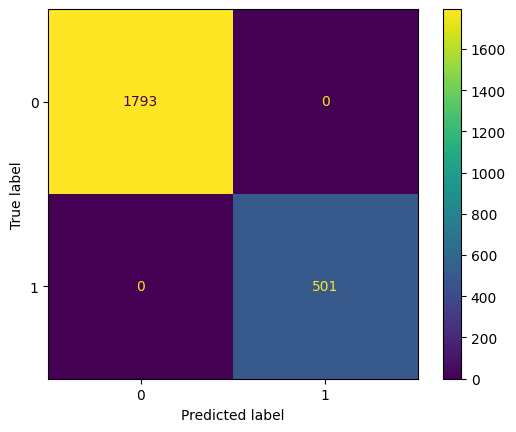

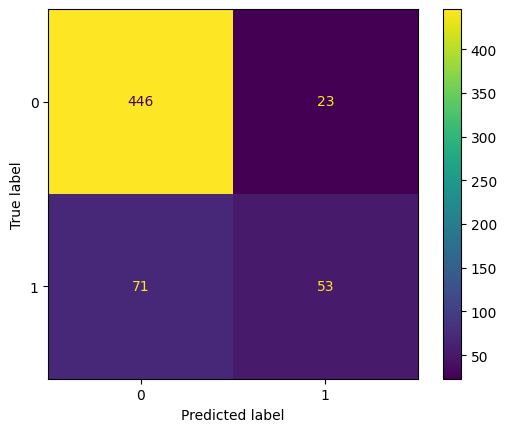

In [45]:
# Membuat prediksi Random Forest sebelum hypertuning
y_pred_rfc_train = model_rfc.predict(X_train)
y_pred_rfc_test = model_rfc.predict(X_test)

# Memperlihatkan confusion_matrix
cm_train_rfc = confusion_matrix(y_train, y_pred_rfc_train)
print('Confusion Matrix Data Train Sebelum Hypertuning: \n', cm_train_rfc)
print(classification_report(y_train, y_pred_rfc_train))

cm_test_rfc = confusion_matrix(y_test, y_pred_rfc_test)
print('Confusion Matrix Data Test Sebelum Hypertuning: \n', cm_test_rfc)
print(classification_report(y_test, y_pred_rfc_test))

ConfusionMatrixDisplay(cm_train_rfc).plot()
ConfusionMatrixDisplay(cm_test_rfc).plot()

Confusion Matrix Data Train Setelah Hypertuning: 
 [[1759   34]
 [ 269  232]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1793
           1       0.87      0.46      0.60       501

    accuracy                           0.87      2294
   macro avg       0.87      0.72      0.76      2294
weighted avg       0.87      0.87      0.85      2294

Confusion Matrix Data Test  Setelah Hypertuning: 
 [[450  19]
 [ 68  56]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       469
           1       0.75      0.45      0.56       124

    accuracy                           0.85       593
   macro avg       0.81      0.71      0.74       593
weighted avg       0.84      0.85      0.84       593



RandomForestClassifier(max_depth=6, n_estimators=200)

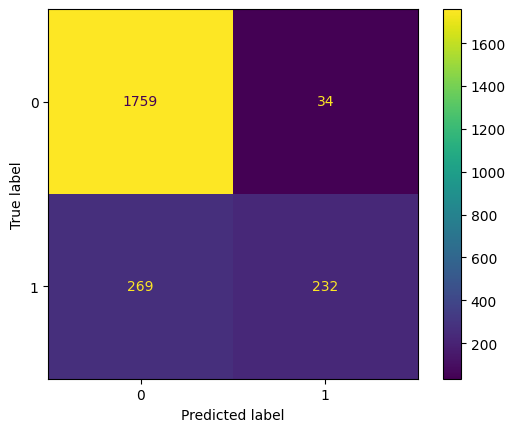

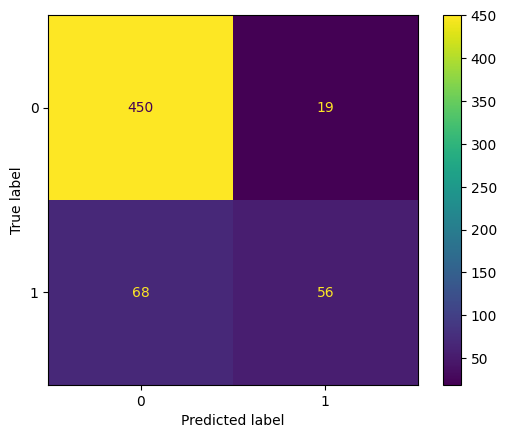

In [48]:
# Membuat prediksi Random Forest setelah hypertuning
best_model = grid.best_estimator_

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Memperlihatkan confusion_matrix
cm_train_rfc_ht = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix Data Train Setelah Hypertuning: \n', cm_train_rfc_ht)
print(classification_report(y_train, y_pred_train))

cm_test_rfc_ht = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix Data Test  Setelah Hypertuning: \n', cm_test_rfc_ht)
print(classification_report(y_test, y_pred_test))

ConfusionMatrixDisplay(cm_train_rfc_ht).plot()
ConfusionMatrixDisplay(cm_test_rfc_ht).plot()

best_model

# ix - Model Saving
> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model. **Dengan melihat hasil Model Evaluation, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan Model Inference dan Model Deployment.**

In [49]:
# Save the Files

joblib.dump(best_model, "best_model.pkl")

['best_model.pkl']

# x - Model Inference
> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model. **Dengan melihat hasil Model Evaluation, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan Model Inference dan Model Deployment.**

In [50]:
load_model = joblib.load("best_model.pkl")

In [51]:
new_data = pd.DataFrame({
    'limit_balance': [450000], 
    'sex': [1], 
    'education_level': [2], 
    'marital_status': [1], 
    'age': [30],
    'pay_0': [0], 
    'pay_2': [0], 
    'pay_3': [0], 
    'pay_4': [0], 
    'pay_5': [0], 
    'pay_6': [0], 
    'bill_amt_1': [160000],
    'bill_amt_2': [70000], 
    'bill_amt_3': [160000], 
    'bill_amt_4': [150000], 
    'bill_amt_5': [140000], 
    'bill_amt_6': [145000],
    'pay_amt_1': [5000], 
    'pay_amt_2': [150000], 
    'pay_amt_3': [160000], 
    'pay_amt_4': [5000], 
    'pay_amt_5': [6000],
    'pay_amt_6': [7000]
})
new_data

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,450000,1,2,1,30,0,0,0,0,0,...,160000,150000,140000,145000,5000,150000,160000,5000,6000,7000


In [52]:
new_data_pred = load_model.predict(new_data)
print(new_data_pred)

[0]


Pada data yang baru dibuat, prediksi yang didapatkan pada `default_payment_next_month` adalah 0 atau No, yang artinya akan bayar tepat waktu

# xi - Pengambilan Kesimpulan
> Pada bagian terakhir ini, **harus berisi** kesimpulan yang mencerminkan hasil yang didapat dengan *objective* yang sudah ditulis di bagian pengenalan.

Berdasarkan hasil pengerjaan, dapat disimpulkan bahwa:
1. Dari EDA, terlihat bahwa:
    - Dapat dilihat bahwa pada grafik nilai `age` < 30 semakin tinggi `age` maka semakin tinggi `limit_balance` dan setelah itu rata
    - Tetapi terlihat juga pada `limit_balance` > 500000, hanya ada `education_level` bertipe 'Graduate School' dan 'University', tidak memandang `sex`
    - Dapat dilihat bahwa pada `pay_0 `sampai `pay_6` dan `bill_amt_1` sampai `bill_amt_6` sangat berkorelasi.
    - Dapat dilihat bahwa didominasi oleh 'Male', 'Graduate School', dan 'Single', kemungkinan para 'male' itu menggunakan credit untuk sekolah ke jenjang berikutnya ataupun membuka usaha.
    - Dapat dilihat bahwa pengguna credit didominasi oleh berumur 30 dan cenderung berkurang saat umurnya bertambah.
2. Berdasarkan Model Evaluation:
    - Dari semua model yang dilakukan 'Cross Validation', yang paling bagus akurasinya adalah model Random Forest, sehingga model tersebut yang akan digunakan pada 'Hyperparameter Tuning'
    - Berdasarkan hasil model sebelum 'Hyperparameter Tuning' datanya cenderung Overfit yang dimana akurasi pada data pada data test lebih kecil dibandingkan data train, sedangkan pada hasil model setelah 'Hyperparameter Tuning' datanya cenderung Goodfit yang dimana akurasi pada data test dan data train itu tinggi dan selisihnya tidak jauh


## Conceptual Problems

> 1. Apa yang dimaksud dengan `criterion` pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !

`Criterion` adalah parameter untuk mengukur bagaimana kualitas split pada setiap node dalam decision tree, antara lain ada "gini", "entropy", dan "log_loss". `Criterion` yang dipakai adalah 'gini' karena merupakan parameter yang paling cepat dalam melakukan permodelan

> 2. Jelaskan apa yang dimaksud dengan `pruning` pada Tree-based model (alasan, definisi, jenis, dll) !

`Pruning` adalah teknik yang digunakan untuk mengurangi beberapa bagian pada decision tree dengan cara menghapus yang dianggap tidak relevan atau menyebabkan overfitting.
 Ada 2 jenis Prunning:
1. Pre-Prunning = Melakukan tuning hyperparameter saat pembuatan decision tree dengan menghentikan pertumbuhan, mencegah lebih dalam atau sebelum mencapai kondisi paling optimal. Hyperparameter yang dapat diatur adalah `max_depth`, `min_samples_leaf`, dan `min_samples_split`.
2. Post-Prunning = Kebalikannya dari Pre-Prunning, tuning dilakukan ketika decision tree sudah tumbuh. Ketika sudah tumbuh, cabangnya dihilangkan untuk mengecegah modelnya menjadi overfitting. Hyperparameter yang dapat diatur adalah `ccp_alpha`.

> 3. Bagaimana cara memilih `K` yang optimal pada KNN ?

K pada KNN adalah jumlah yang neighbor terdekat berdasarkan jarak, untuk memilih yang optimal melakukan uji berkali-kali sampai menendapatkan accuracy yang tinggi.

> 4. Jelaskan apa yang dimaksud dengan `Cross Validation` !

 `Cross Validation` adalah teknik untuk mengevaluasi dan menguji kemampuan generalisasi model pada dataset, tujuannya untuk mengukur seberapa baik model yang akan bekerja pada dataset yang ada. 

> 5. Apa yang dimaksud dengan metrics-metrics berikut : `Accuracy`, `Precision`, `Recall`, `F1 Score`, dan kapan waktu yang tepat untuk menggunakannya ?

- `Accuracy` adalah rasio prediksi benar antara positif dan negatif dengan keseluruhan data
- `Precision` adalah perbandingan antara True Positive dengan banyaknya data yang diprediksi positive, data yang diprediksi benar
- `Recall` adalah perbandingan antara True Positive dengan banyaknya data yang aktual positive, data yang aktual
- `F1 Score`  adalah mean dari precision dan recall dengan nilai yang bagus 1 dan buruk 0.

Waktu yang tepat menggunakannya adalah:

    - Jika ingin memfokus pada hasil prediksi dengan nilai positive sebanyak mungkin yang benar sehingga model akan fokus pada pengurangan nilai false positif, maka yang dilihat 'Precision'.
    - Sedangkan jika ingin hasil prediksi nilai positive mendekati nilai positive aktual, maka digunakan "Recall" sebagai patokan dengan fokus pengurangan pada nilai false negatif.
    